In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt



In [4]:
!apt-get install unrar
!unrar x "/content/drive/MyDrive/computer_vision/images_by_class.rar" "/content/images/"

Reading package lists... Done
^C

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/computer_vision/images_by_class.rar


Would you like to replace the existing file /content/images/images_by_class/10/10_1.jpg
 48239 bytes, modified on 2025-05-03 14:14
with a new one
 48239 bytes, modified on 2025-05-03 14:14

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


remove any currpted image or missing labels




In [ ]:
import tensorflow as tf

DATA_DIR = '/content/images/images_by_class'  
BATCH_SIZE = 64
IMG_HEIGHT = 224
IMG_WIDTH = 224
SEED = 42

# Create the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)




val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)
class_names = val_ds.class_names


print("Class names (speeds):", train_ds.class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 23761 files belonging to 13 classes.
Using 19009 files for training.
Found 23761 files belonging to 13 classes.
Using 4752 files for validation.
Class names (speeds): ['10', '100', '110', '120', '140', '20', '30', '40', '50', '60', '70', '80', '90']


In [29]:
for image,label in train_ds.take(1):
  print(label[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(13,), dtype=float32)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Base model (frozen)
base_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base_model.trainable = False  


model = keras.Sequential([
   
    base_model,

 
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),


    layers.Dense(13, activation='softmax')
])


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [8]:
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 106s 128ms/step - accuracy: 0.4843 - loss: 1.8236 - val_accuracy: 0.9093 - val_loss: 0.2837
Epoch 2/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 52s 86ms/step - accuracy: 0.8461 - loss: 0.4820 - val_accuracy: 0.9646 - val_loss: 0.1076
Epoch 3/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.9158 - loss: 0.2631 - val_accuracy: 0.9701 - val_loss: 0.0819
Epoch 4/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.9465 - loss: 0.1682 - val_accuracy: 0.9695 - val_loss: 0.0814
Epoch 5/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 50s 84ms/step - accuracy: 0.9503 - loss: 0.1479 - val_accuracy: 0.9714 - val_loss: 0.0700
Epoch 6/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9606 - loss: 0.1159 - val_accuracy: 0.9720 - val_loss: 0.0652
Epoch 7/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step - accuracy: 0.9627 - loss: 0.1085 - val_accuracy: 0.9739 - val_loss: 0.0655
Epoch 8/10
595/595 ━━━━━━━━━━━━━━━━━━━━ 50s 84ms/step - accuracy: 0.9655 - loss: 0.0932 

In [9]:
model.save('classfaction_model.h5')

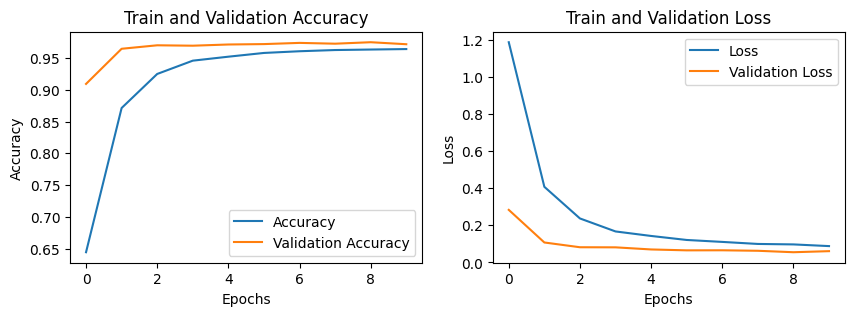

In [11]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('Train and Validation Accuracy')
plt.plot(model.history.history['accuracy'], label='Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Train and Validation Loss')
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

loss, accuracy = model.evaluate(val_ds)

149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9728 - loss: 0.0627


In [15]:
print(f"The accuracy of the model is {accuracy}")
print(f"The Loss in the model is     {loss}")

The accuracy of the model is 0.9718013405799866
The Loss in the model is     0.06081211939454079
